In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [2]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path = 'C://Users//Facu//Downloads//Datos_Nepal'
combined_df = combine_csv_files(folder_path)
combined_df.to_csv("RF_nepal_data.csv", index=False)

In [3]:
# Calcular la nueva columna 'threshold'
# Calcular la nueva columna 'threshold'
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47969 entries, 0 to 47968
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  47969 non-null  int64  
 1   B11           47969 non-null  float64
 2   B12           47969 non-null  float64
 3   B2            47969 non-null  float64
 4   B3            47969 non-null  float64
 5   B4            47969 non-null  float64
 6   CH            47969 non-null  float64
 7   MNDWI         47969 non-null  float64
 8   NDBI          47969 non-null  float64
 9   NDVI          47969 non-null  float64
 10  RVI           47969 non-null  float64
 11  VH            47969 non-null  float64
 12  VV            47969 non-null  float64
 13  VV_VH_div_2   47969 non-null  float64
 14  VV_div_VH     47969 non-null  float64
 15  VV_minus_VH   47969 non-null  float64
 16  VV_plus_VH    47969 non-null  float64
 17  agbd          47969 non-null  float64
 18  agbd_se       47969 non-nu

In [4]:
# Filtrar los datos cuyo valor en la columna 'threshold' sea menor que 50
df_filtered = combined_df[combined_df['threshold'] < 50]

# Mostrar las primeras filas del DataFrame filtrado para verificar
df_filtered.describe()

,system:index,B11,B12,B2,B3,B4,CH,MNDWI,NDBI,NDVI,...,VV,VV_VH_div_2,VV_div_VH,VV_minus_VH,VV_plus_VH,agbd,agbd_se,elevation,slope,threshold
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,...,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,581.610153,1857.313958,1117.525384,380.951808,594.414232,525.966470,15.260458,-0.519505,-0.129377,0.647683,...,-8.897751,-12.166602,0.575346,6.537704,-24.333205,67.268183,17.090052,190.218100,4.492213,31.513256
std,414.141979,428.738598,444.513510,160.147679,203.022087,277.480362,4.536994,0.055640,0.105938,0.128964,...,0.953872,0.875790,0.039254,0.526819,1.751580,40.969507,0.737198,62.889477,5.239242,11.736623
min,0.000000,536.000000,318.500000,98.500000,207.000000,140.000000,0.000000,-0.674946,-0.399214,-0.058042,...,-12.965337,-16.550133,0.391969,4.719225,-33.100266,10.692785,2.985144,95.000000,0.000000,1.321927
25%,241.000000,1570.625000,824.000000,291.500000,476.500000,356.500000,12.000000,-0.555436,-0.207902,0.593849,...,-9.489819,-12.656887,0.547380,6.217404,-25.313774,41.017143,17.125278,142.000000,1.854334,22.636681
50%,483.000000,1779.000000,1015.000000,337.500000,544.000000,447.000000,15.000000,-0.524217,-0.140953,0.679857,...,-8.801585,-12.063254,0.574340,6.561255,-24.126509,52.474690,17.128134,175.000000,2.785505,32.581712
75%,884.000000,2074.000000,1310.000000,417.000000,648.500000,593.000000,18.000000,-0.491036,-0.058626,0.739116,...,-8.223743,-11.600226,0.600508,6.899249,-23.200452,75.646340,17.130713,225.000000,4.627368,41.623479
max,1938.000000,4340.500000,4141.500000,1812.000000,2479.000000,2819.000000,29.000000,0.069848,0.202614,0.851292,...,-4.604213,-8.020084,0.691812,9.156950,-16.040169,600.002140,17.172379,559.000000,45.936745,49.986630


In [5]:
def remove_outliers(df, column_name):

    # Calcular la media y la desviación estándar de la columna
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Calcular el umbral para identificar los outliers
    threshold = 3 * std_dev
    
    # Crear una condición para filtrar los outliers
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))
    
    # Crear un nuevo DataFrame con los outliers eliminados
    df_filtered = df[condition]
    
    return df_filtered

# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado df_combined con una columna "agbd"
# df_combined = pd.read_csv("ruta_a_tu_csv.csv")

df_filtered_remove = remove_outliers(df_filtered, "agbd")

# Mostrar las primeras filas del DataFrame filtrado
df_filtered_remove

,system:index,B11,B12,B2,B3,B4,CH,MNDWI,NDBI,NDVI,...,VV_VH_div_2,VV_div_VH,VV_minus_VH,VV_plus_VH,agbd,agbd_se,elevation,slope,.geo,threshold
10,10,1684.0,977.0,380.5,527.5,429.5,11.0,-0.522948,-0.033156,0.614625,...,-11.807947,0.540200,7.050115,-23.615894,60.768040,17.124878,126.0,5.270186,"{""geodesic"":false,""type"":""Point"",""coordinates""...",28.180731
11,11,2132.5,1448.0,432.5,644.0,569.5,9.0,-0.536107,-0.025588,0.595238,...,-12.621630,0.570273,6.908165,-25.243260,60.768040,17.124878,125.0,1.393684,"{""geodesic"":false,""type"":""Point"",""coordinates""...",28.180731
12,12,2788.0,2169.0,694.0,948.0,1087.0,10.0,-0.492505,0.078947,0.372945,...,-11.946740,0.592196,6.119758,-23.893480,46.412884,17.131914,128.0,1.393688,"{""geodesic"":false,""type"":""Point"",""coordinates""...",36.911979
13,13,1837.5,1000.0,231.0,469.5,339.5,14.0,-0.592978,-0.134276,0.752821,...,-11.113693,0.574634,6.004434,-22.227386,80.160034,17.124523,136.0,2.080353,"{""geodesic"":false,""type"":""Point"",""coordinates""...",21.362919
14,14,1765.0,1000.0,229.0,477.0,382.0,14.0,-0.574487,-0.190367,0.743366,...,-11.139632,0.567201,6.152647,-22.279264,80.160034,17.124523,134.0,4.547582,"{""geodesic"":false,""type"":""Point"",""coordinates""...",21.362919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47958,887,1461.0,751.0,272.0,433.0,306.0,18.0,-0.542767,-0.221215,0.764343,...,-11.658970,0.556722,6.639796,-23.317940,67.102520,17.128970,184.0,3.254029,"{""geodesic"":false,""type"":""Point"",""coordinates""...",25.526567
47960,889,1758.0,943.0,303.0,453.0,353.0,19.0,-0.590231,-0.147430,0.740346,...,-11.647197,0.566892,6.438850,-23.294394,58.132317,17.134916,182.0,2.277869,"{""geodesic"":false,""type"":""Point"",""coordinates""...",29.475715
47961,890,1758.0,943.0,303.0,453.0,353.0,19.0,-0.590231,-0.147430,0.740346,...,-11.693839,0.563792,6.523820,-23.387678,58.132317,17.134916,184.0,4.257814,"{""geodesic"":false,""type"":""Point"",""coordinates""...",29.475715
47963,892,1751.5,917.5,273.0,435.0,354.5,18.0,-0.602104,-0.144880,0.737359,...,-11.500051,0.554233,6.596615,-23.000103,58.132317,17.134916,182.0,1.393900,"{""geodesic"":false,""type"":""Point"",""coordinates""...",29.475715


In [6]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 180]
df_nuevo.info()
label = df_nuevo['agbd']

<class 'pandas.core.frame.DataFrame'>
Index: 9215 entries, 10 to 47964
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  9215 non-null   int64  
 1   B11           9215 non-null   float64
 2   B12           9215 non-null   float64
 3   B2            9215 non-null   float64
 4   B3            9215 non-null   float64
 5   B4            9215 non-null   float64
 6   CH            9215 non-null   float64
 7   MNDWI         9215 non-null   float64
 8   NDBI          9215 non-null   float64
 9   NDVI          9215 non-null   float64
 10  RVI           9215 non-null   float64
 11  VH            9215 non-null   float64
 12  VV            9215 non-null   float64
 13  VV_VH_div_2   9215 non-null   float64
 14  VV_div_VH     9215 non-null   float64
 15  VV_minus_VH   9215 non-null   float64
 16  VV_plus_VH    9215 non-null   float64
 17  agbd          9215 non-null   float64
 18  agbd_se       9215 non-null   f

In [20]:
# df_proces = df_filtered_remove[~df_filtered_remove['label'].isin([2, 6])]
# df_proces

In [7]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['threshold', 'agbd_se','.geo','system:index']
df_modified = drop_columns(df_filtered_remove, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9269 entries, 10 to 47964
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B11          9269 non-null   float64
 1   B12          9269 non-null   float64
 2   B2           9269 non-null   float64
 3   B3           9269 non-null   float64
 4   B4           9269 non-null   float64
 5   CH           9269 non-null   float64
 6   MNDWI        9269 non-null   float64
 7   NDBI         9269 non-null   float64
 8   NDVI         9269 non-null   float64
 9   RVI          9269 non-null   float64
 10  VH           9269 non-null   float64
 11  VV           9269 non-null   float64
 12  VV_VH_div_2  9269 non-null   float64
 13  VV_div_VH    9269 non-null   float64
 14  VV_minus_VH  9269 non-null   float64
 15  VV_plus_VH   9269 non-null   float64
 16  agbd         9269 non-null   float64
 17  elevation    9269 non-null   float64
 18  slope        9269 non-null   float64
dtypes: float6

In [8]:
# Obtener los nombres de las columnas excepto 'agbd' y '.geo'
features = [col for col in df_modified.columns if col not in ['agbd', 'label','.geo', 'system:index']]

# Mostrar la lista de características
print(features)

['B11', 'B12', 'B2', 'B3', 'B4', 'CH', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'slope']


In [19]:
feature_names =  ['B11', 'B12', 'B2', 'B3', 'B4', 'CH', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'slope']


In [10]:
# Separar la variable objetivo 'agbd'
y = df_modified['agbd']

# Separar las variables independientes (todas excepto 'agbd' y '.geo')
X = df_modified.drop(columns=['agbd'])

X

,B11,B12,B2,B3,B4,CH,MNDWI,NDBI,NDVI,RVI,VH,VV,VV_VH_div_2,VV_div_VH,VV_minus_VH,VV_plus_VH,elevation,slope
10,1684.0,977.0,380.5,527.5,429.5,11.0,-0.522948,-0.033156,0.614625,2.597065,-15.333005,-8.282890,-11.807947,0.540200,7.050115,-23.615894,126.0,5.270186
11,2132.5,1448.0,432.5,644.0,569.5,9.0,-0.536107,-0.025588,0.595238,2.547328,-16.075712,-9.167547,-12.621630,0.570273,6.908165,-25.243260,125.0,1.393684
12,2788.0,2169.0,694.0,948.0,1087.0,10.0,-0.492505,0.078947,0.372945,2.512253,-15.006619,-8.886861,-11.946740,0.592196,6.119758,-23.893480,128.0,1.393688
13,1837.5,1000.0,231.0,469.5,339.5,14.0,-0.592978,-0.134276,0.752821,2.540273,-14.115911,-8.111476,-11.113693,0.574634,6.004434,-22.227386,136.0,2.080353
14,1765.0,1000.0,229.0,477.0,382.0,14.0,-0.574487,-0.190367,0.743366,2.552320,-14.215957,-8.063309,-11.139632,0.567201,6.152647,-22.279264,134.0,4.547582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47958,1461.0,751.0,272.0,433.0,306.0,18.0,-0.542767,-0.221215,0.764343,2.569501,-14.978869,-8.339072,-11.658970,0.556722,6.639796,-23.317940,184.0,3.254029
47960,1758.0,943.0,303.0,453.0,353.0,19.0,-0.590231,-0.147430,0.740346,2.552824,-14.866622,-8.427772,-11.647197,0.566892,6.438850,-23.294394,182.0,2.277869
47961,1758.0,943.0,303.0,453.0,353.0,19.0,-0.590231,-0.147430,0.740346,2.557885,-14.955749,-8.431929,-11.693839,0.563792,6.523820,-23.387678,184.0,4.257814
47963,1751.5,917.5,273.0,435.0,354.5,18.0,-0.602104,-0.144880,0.737359,2.573616,-14.798359,-8.201744,-11.500051,0.554233,6.596615,-23.000103,182.0,1.393900


In [14]:
feature_names = features =  ['B11', 'B12', 'B2', 'B3', 'B4', 'CH', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'VH', 'VV', 'VV_VH_div_2', 'VV_div_VH', 'VV_minus_VH', 'VV_plus_VH', 'elevation', 'slope']


label = "agbd"


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\Facu\anaconda3\envs\Geo\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Root Mean Squared Error: 13.512733274776576
R^2 Score: 0.8216574307561473


In [28]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 14, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 


rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 16.246119574116232
R^2 Score: 0.742208911144792


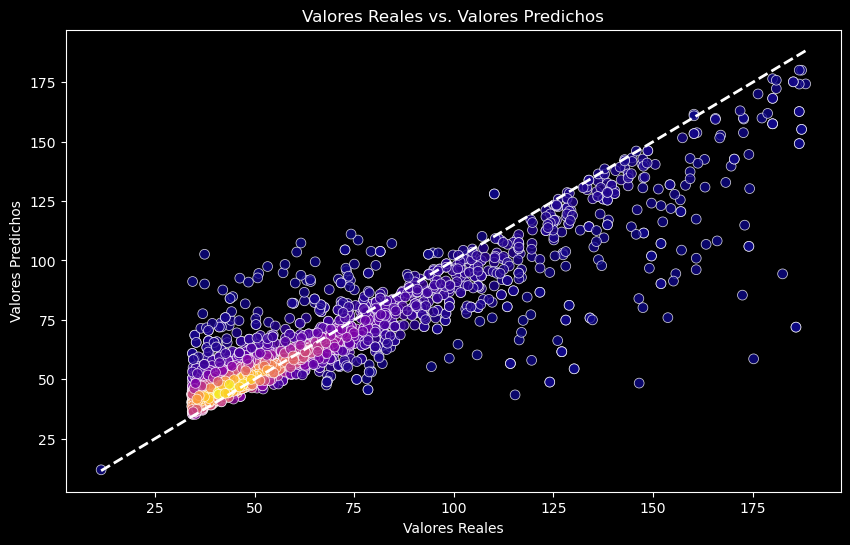

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')

# Guardar el gráfico
plt.savefig('real_vs_predicho2.png', facecolor='black')

# Mostrar el gráfico
plt.show()


        Feature  Importance
5            CH    0.178186
16    elevation    0.123055
17        slope    0.089564
14  VV_minus_VH    0.058720
7          NDBI    0.058143
6         MNDWI    0.053655
0           B11    0.052734
2            B2    0.048152
10           VH    0.042501
11           VV    0.041041
8          NDVI    0.040331
1           B12    0.039444
4            B4    0.037255
13    VV_div_VH    0.033018
3            B3    0.033016
9           RVI    0.028366
15   VV_plus_VH    0.021845
12  VV_VH_div_2    0.020973


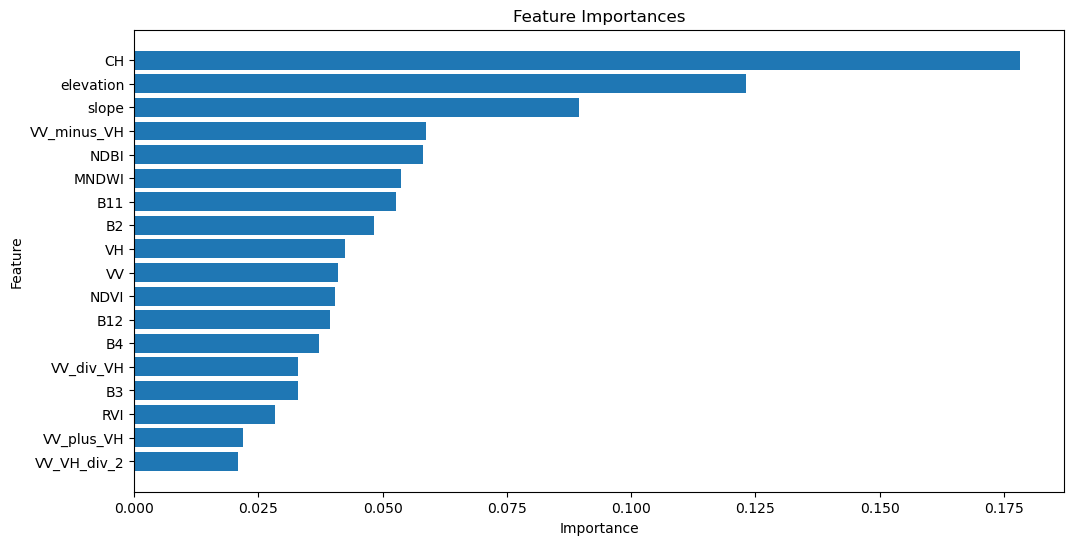

In [16]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = best_rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [29]:
# convert the estimator into a list of strings
# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names,output_mode='regression')
# print the first tree to see the result
# print(trees[0])

In [32]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [30]:
user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_Gee_nepal_optimo2"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

EEException: Request payload size exceeds the limit: 10485760 bytes.

In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')